In [14]:
# Trying to fix the range doppler stuff in here

import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift # Might not need this
from radar_ffts import range_doppler_fft, range_doppler_sum
from cfar import cfar, clean_cfar
from radar_functions import get_measurement_parameters, cfar_map, save_range_doppler_map, save_cfar_map, get_data_files
import os

c = 299792458 # metres per second - need this

In [15]:
session2_preface = '../4022S_data/session2/'

tennis_ball_tests = get_data_files(session2_preface) #just using this test
walking_away_test = h5py.File('../4022S_data/undergrad_testset/Experiment_moving_target_back_data.hdf5', 'r')

range_bin_size = 0.1953138069708251


frame_data = walking_away_test[f'Sensors/TI_Radar/Data/Frame_5/frame_data']
fftd_frame_data = range_doppler_fft(frame_data, 0, 0)

plotted_fftd_frame_data = range_doppler_sum(fftd_frame_data)
print(plotted_fftd_frame_data.dtype)

float64


In [26]:
def make_map(plotted_fftd_frame_data, range_bin_size):
    plt.figure()
    plt.imshow(plotted_fftd_frame_data, aspect='auto', cmap='jet')
    plt.title('Range-Doppler Map')
    plt.xlabel('Doppler')
    plt.ylabel('Range')
    plt.colorbar(label='Power (dB)')
    # Get current y-ticks and labels
    x_ticks = plt.gca().get_xticks()
    plt.gca().set_xticklabels(np.round(x_ticks[::1]*range_bin_size,2)) #TODO: Figure out how to relabel the data, not just the ticks
    plt.show()



def range_doppler_map(hdf5_file_path, frame, range_bin_size, make_map_check): # This started as a clone from radar_functions
    
    """Generates a range doppler map of hdf5 radar data. Can generate a plot (make_map = 1) or just the data (make_map = 0)
        -> make_map = 1 plots the heatmap, heat_map = 0 skips it
        -> save_map = 1 saves the map as a png, save_map = 0 skips it"""
    
    frame_data = hdf5_file_path[f'Sensors/TI_Radar/Data/Frame_{frame}/frame_data']
    range_pad = 0
    doppler_pad = 0

    fftd_frame_data = range_doppler_fft(frame_data, range_pad, doppler_pad)
    plotted_fftd_frame_data = range_doppler_sum(fftd_frame_data)
    plotted_fftd_frame_data=np.flip(plotted_fftd_frame_data, 0)

    if make_map_check:
        make_map(np.rot90(plotted_fftd_frame_data), range_bin_size)
#        make_map(plotted_fftd_frame_data, range_bin_size)
        
    return plotted_fftd_frame_data

C:\Users\harry\AppData\Local\Temp\ipykernel_7900\224402362.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(np.round(x_ticks[::1]*range_bin_size,2)) #TODO: Figure out how to relabel the data, not just the ticks


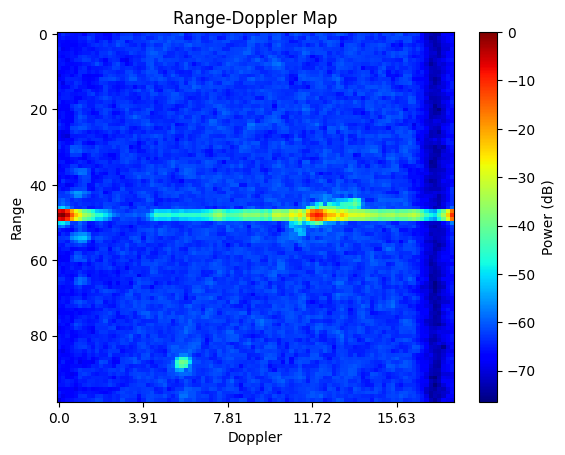

array([[-70.14321398, -65.9663825 , -64.86802526, ..., -66.02016684,
        -65.97421801, -65.99664693],
       [-67.57807272, -68.79693078, -66.50624671, ..., -66.52349222,
        -64.82040351, -63.39453746],
       [-65.7964417 , -67.68045774, -67.63184119, ..., -67.13378629,
        -65.81153526, -64.87316741],
       ...,
       [-67.67634453, -71.57180748, -71.33823877, ..., -69.39349599,
        -69.1330591 , -67.95818735],
       [-68.61893967, -67.96383248, -70.19245617, ..., -67.73593454,
        -67.72488354, -68.00494499],
       [-69.25638661, -67.07706104, -66.0386968 , ..., -66.26790545,
        -65.89049465, -66.94528275]])

In [31]:
range_doppler_map(tennis_ball_tests[0], 76, range_bin_size, True)